In [1]:
import lightkurve as lk
import giants as g
import numpy as np

In [11]:
tic = 287434297

In [12]:
lcc = g.Giant().from_eleanor(tic)

Creating light curve for target 287434297 for sectors [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13].


100%|██████████| 1245/1245 [00:16<00:00, 76.57it/s]


Inflating...


100%|██████████| 1288/1288 [00:18<00:00, 68.61it/s]


Inflating...


100%|██████████| 1060/1060 [00:16<00:00, 67.64it/s]


Inflating...


100%|██████████| 1196/1196 [00:15<00:00, 79.34it/s]


Inflating...


  0%|          | 0/993 [00:00<?, ?it/s]
ERROR: KeyboardInterrupt [tensorflow.python.client.session]


KeyboardInterrupt: 

In [47]:
lc = lcc[1]
mask = (lc.time > 1510) * (lc.time < 1545) + (lc.flux < 0.995) + (lc.flux > 1.005)
lc = lc[~mask]
print(lc.time)

[1325.32255761 1325.34337073 1325.36418384 ... 1682.30161854 1682.32243157
 1682.34330563]


In [48]:
pg = lc.remove_outliers().to_periodogram()

//anaconda3/lib/python3.7/site-packages/lightkurve/periodogram.py:744: LightkurveWarning: Input light curve will be normalized.
  LightkurveWarning)


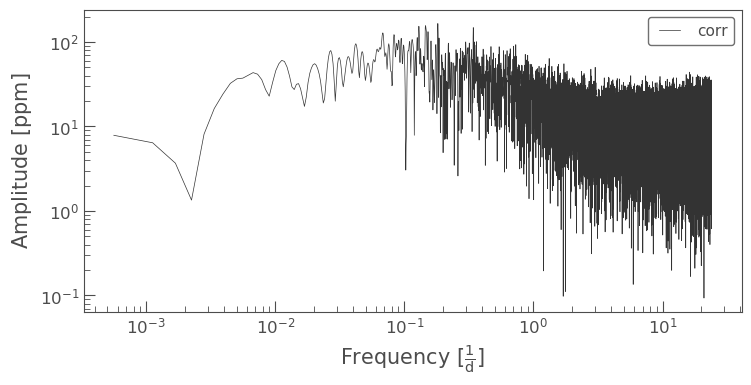

In [49]:
pg.plot(scale='log')

In [50]:
seismology = pg.to_seismology()

//anaconda3/lib/python3.7/site-packages/lightkurve/seismology/core.py:60: LightkurveWarning: Seismology received a periodogram which does not appear to have been background-corrected. Please consider calling `periodogram.flatten()` prior to extracting seismological parameters.
  LightkurveWarning)


In [51]:
seismology.estimate_numax()

numax: 2.08 1 / d (method: ACF2D)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c611b9780>,
      dtype=object)

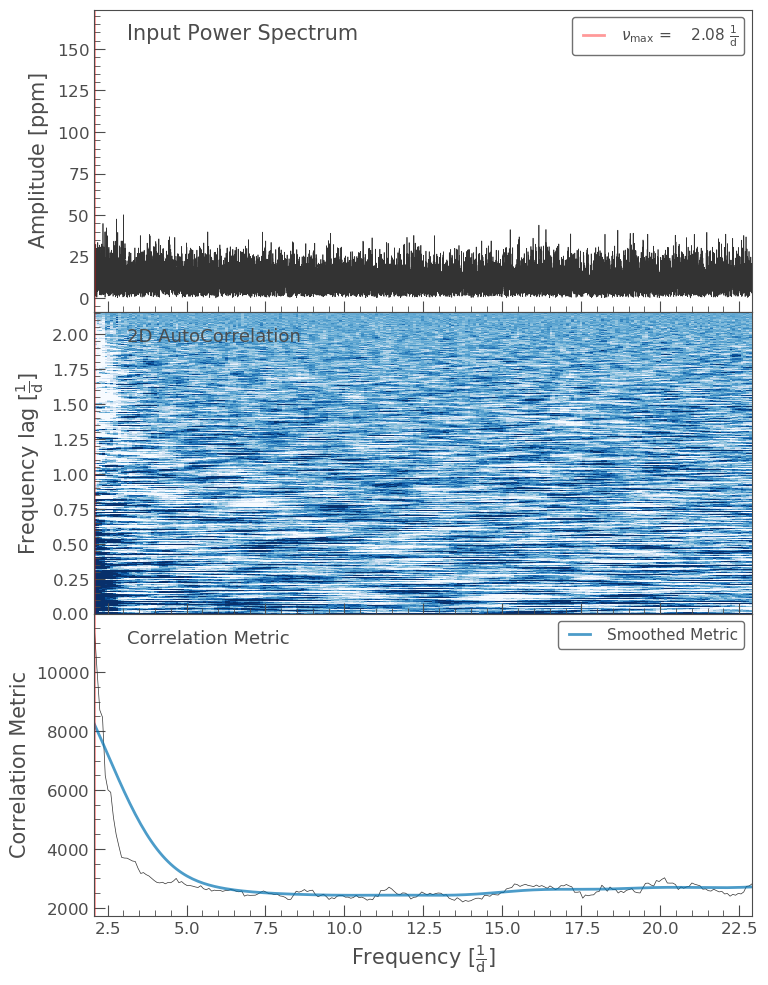

In [52]:
seismology.diagnose_numax()

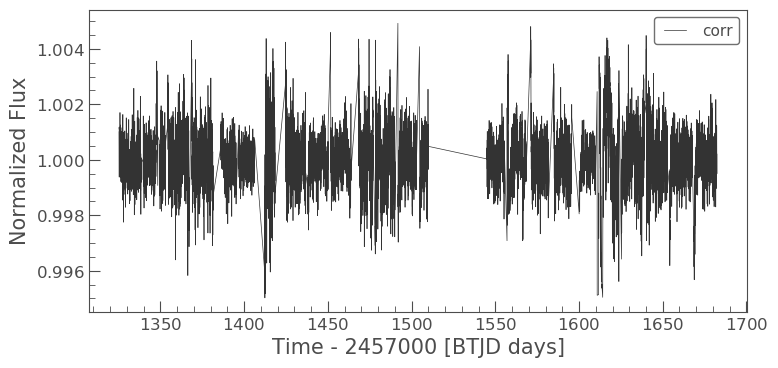

In [53]:
lc.plot()